# Don't Delay

A Capstone project for The Data Incubator
by Stacy Karthas

In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.plotly as py
matplotlib.rcParams['savefig.dpi'] = 144


The Problem: 
Millions of Americans take domestic flights within the United States every day and many of them will be delayed. This can cause unforeseen circumstances to ruin plans and engagements. 

The Process:
29 years of data for delays and cancelations of domestic flights, along with passenger information is available via the US department of Transportation. This data has been and will be used to predict the likelihood of flight delay.


The Solution:
An application that would predict the likelihood and length of a delay a customer can expect depending on the flight they choose. 

Added Bonus: 
If customers begin using this application, airlines are more likely to go to greater lengths to avoid delays so they can be more competitive and retain customers.

Getting the data from: [US_DOT](http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time)

Additional Plots are available in my Plotly dashboard [here](https://plot.ly/dashboard/skarthas:30/present)

In [3]:
import pandas as pd
df_oct15 = pd.read_csv('758944068_T_ONTIMEoct15.csv')
df_nov15 = pd.read_csv('758944068_T_ONTIMEnov2015.csv')
df_dec15 = pd.read_csv('758944068_T_ONTIMEdec2015.csv')
df_jan16 = pd.read_csv('758944068_T_ONTIMEjan2016.csv')#545087628_T_ONTIME0116.csv')
df_feb16 = pd.read_csv('758944068_T_ONTIMEfeb2016.csv')
df_mar16 = pd.read_csv('758944068_T_ONTIMEmar2016.csv')
df_apr16 = pd.read_csv('758944068_T_ONTIMEapr2016.csv')
df_may16 = pd.read_csv('758944068_T_ONTIMEmay2016.csv')
df_jun16 = pd.read_csv('758944068_T_ONTIMEjun2016.csv')
df_jul16 = pd.read_csv('758944068_T_ONTIMEjul2016.csv')
df_aug16 = pd.read_csv('758944068_T_ONTIMEaug2016.csv')
df_sep16 = pd.read_csv('758944068_T_ONTIMEsep2016.csv')
#df_oct16 = pd.read_csv('758944068_T_ONTIMEoct2016.csv')
#df_nov16 = pd.read_csv('545087628_T_ONTIME1116.csv')
#df_dec16 = pd.read_csv('545087628_T_ONTIME1216.csv')

/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.



In [57]:
df_2016 = pd.concat([df_oct15,df_nov15,df_dec15,df_jan16,df_feb16,df_mar16,df_apr16,df_may16,df_jun16,df_jul16,df_aug16,df_sep16])

In [5]:
#df_2016['delay'] = -df_2016['CRS_DEP_TIME'] + df_2016['DEP_TIME']####AAAAH!!!! This is not quite right because of delays after midnight


Some Statistics:

In [43]:
df_2016['DEP_DELAY_NEW'].mean()

11.80930656022165

In [44]:
df_2016.DEP_DELAY_NEW.max()

1964.0

In [45]:
df_2016['DEP_DELAY_NEW'].min()

0.0

A few exploratory plots:

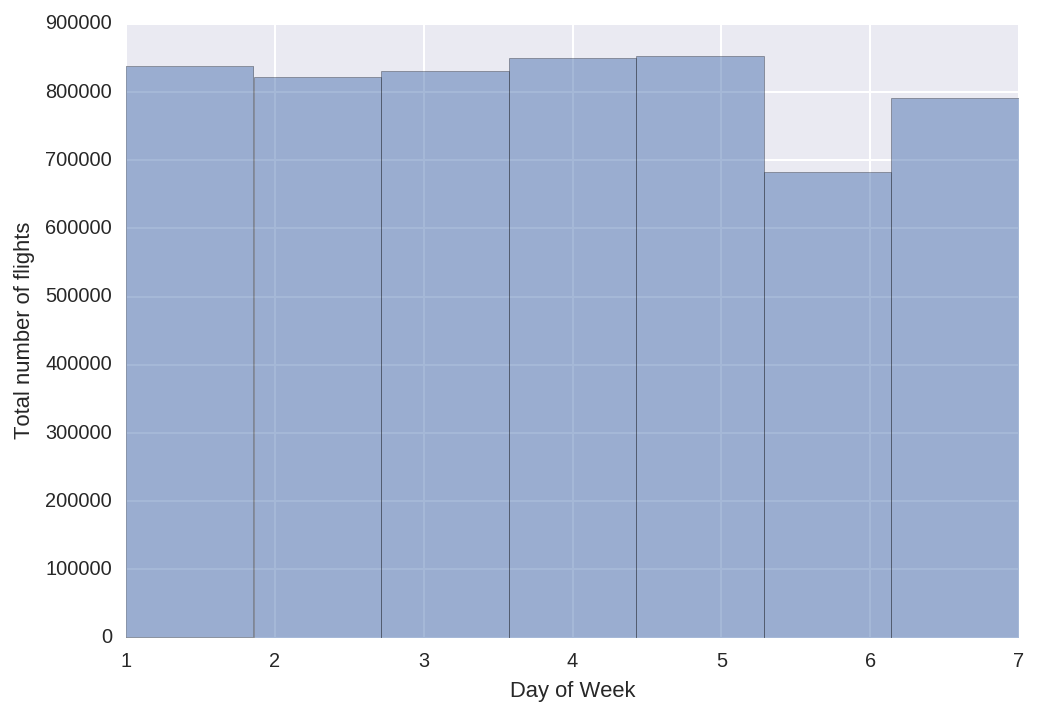

In [46]:
#distribution of flights
plt_dow = df_2016['DAY_OF_WEEK'].hist(bins=7, alpha=0.5)
plt_dow.set_xlabel('Day of Week')
plt_dow.set_ylabel('Total number of flights')

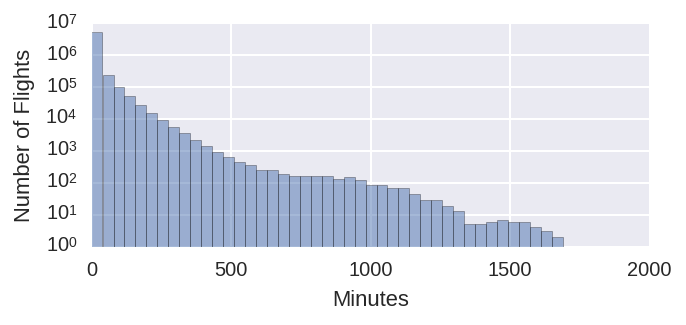

In [42]:
plt_del = df_2016['DEP_DELAY_NEW'].hist(bins=50, alpha=0.5,figsize=(5,2))
plt_del.set_xlabel('Minutes')
plt_del.set_ylabel('Number of Flights')
#plt_del.set_xlim(-100, 2000)
plt_del.set_yscale('log')

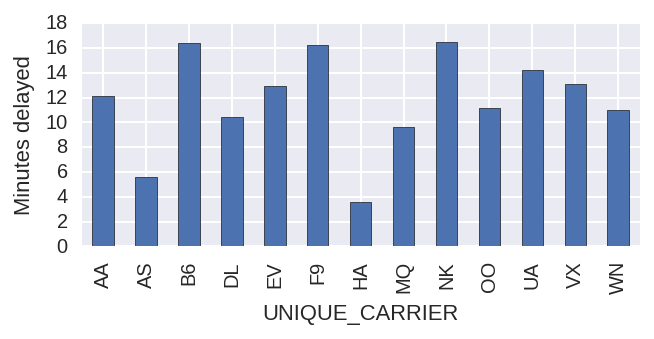

In [47]:
plt_UC = df_2016.groupby('UNIQUE_CARRIER')['DEP_DELAY_NEW'].mean().plot.bar(figsize=(5,2))
plt_UC.set_ylabel('Minutes delayed')

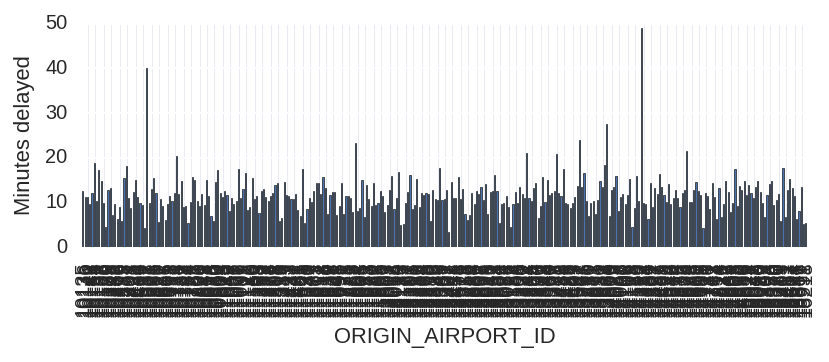

In [48]:
plt_UA = df_2016.groupby('ORIGIN_AIRPORT_ID')['DEP_DELAY_NEW'].mean().plot.bar(figsize=(6.5,2))
plt_UA.set_ylabel('Minutes delayed')

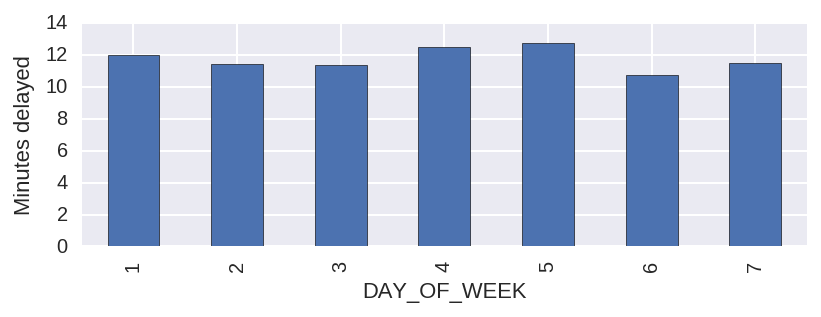

In [49]:
plt_dow = df_2016.groupby('DAY_OF_WEEK')['DEP_DELAY_NEW'].mean().plot.bar(figsize=(6.5,2))
plt_dow.set_ylabel('Minutes delayed')

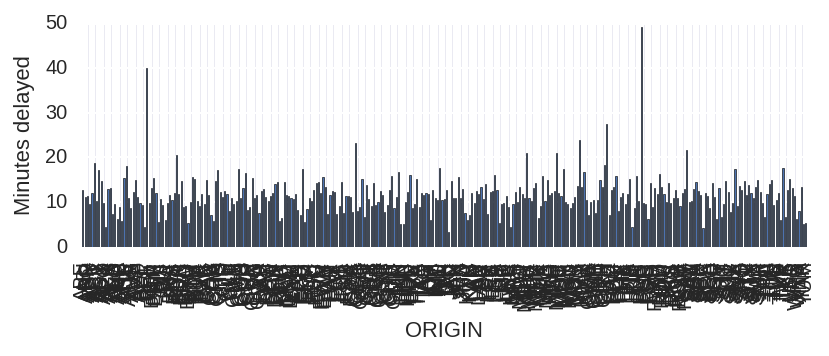

In [50]:
plt_dow = df_2016.groupby('ORIGIN')['DEP_DELAY_NEW'].mean().plot.bar(figsize=(6.5,2))
plt_dow.set_ylabel('Minutes delayed')

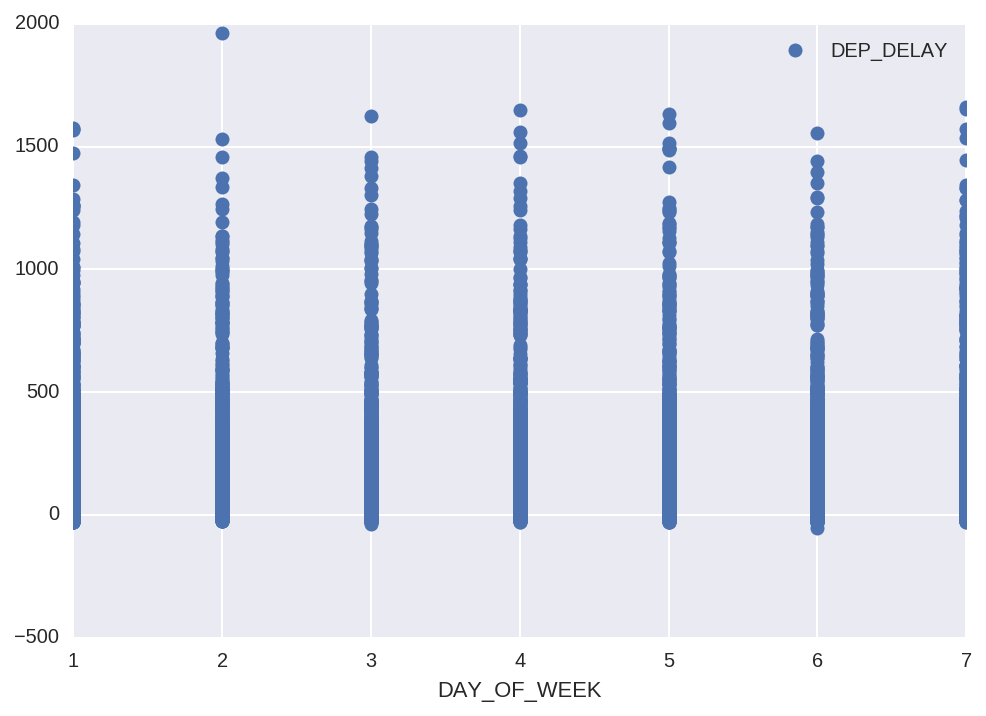

In [15]:
df_2016[df_2016['UNIQUE_CARRIER'] =='AA'].plot(x='DAY_OF_WEEK',y='DEP_DELAY',style='o')


In [16]:
#plt_weather = df_2016.WEATHER_DELAY.dropna().plot.bar()

#plt_UC = df_2016.groupby('DAY_OF_WEEK')['delay'].mean().plot.bar(figsize=(6.5,2))
#plt_UC.set_ylabel('Minutes delayed')


In [17]:
#df_2016.WEATHER_DELAY

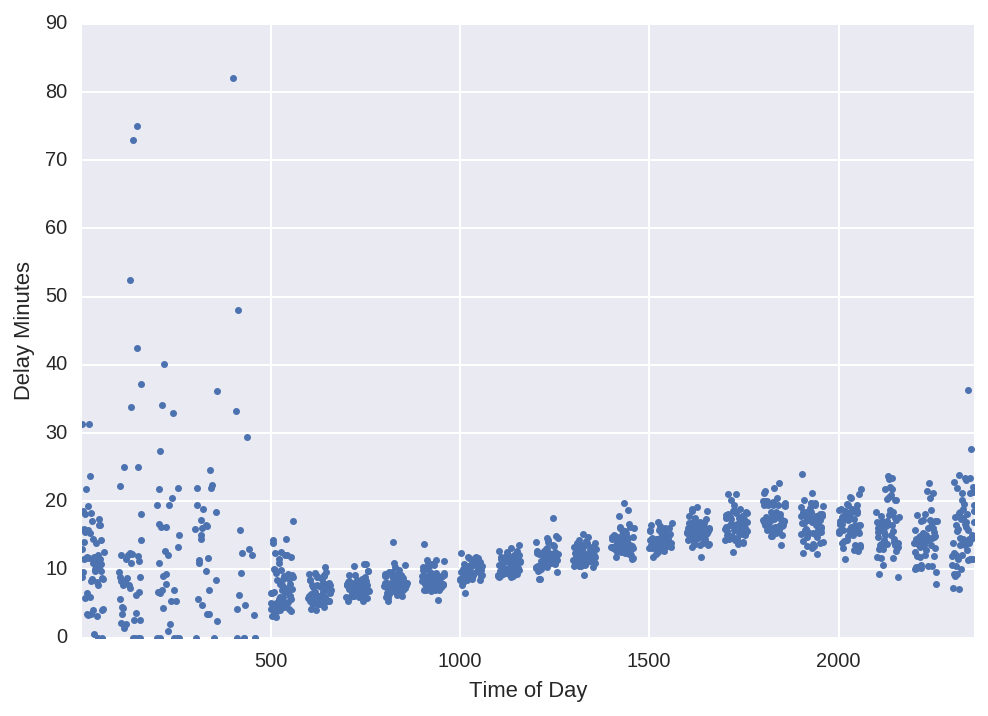

In [51]:
plt_tod = df_2016.groupby('CRS_DEP_TIME')['DEP_DELAY_NEW'].mean().plot(style='.')
plt_tod.set_xlabel('Time of Day')
plt_tod.set_ylabel('Delay Minutes')

In [19]:
#df_2016[:100]

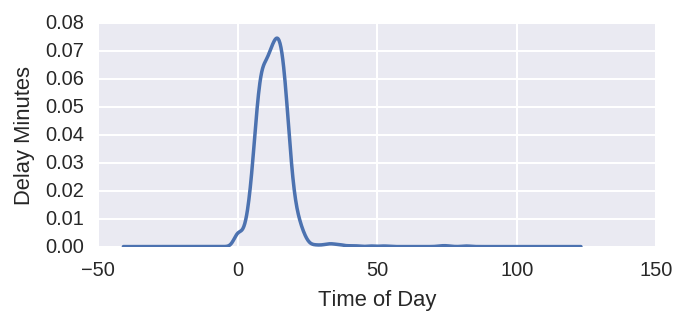

In [52]:
#fig, ax = plt.subplots(figsize=(8,6))
#for df in df_2016.groupby('')
plt_tod = df_2016.groupby('CRS_DEP_TIME')['DEP_DELAY_NEW'].mean().plot(kind = 'kde',figsize=(5,2))
plt_tod.set_xlabel('Time of Day')
plt_tod.set_ylabel('Delay Minutes')

In [21]:
carriers = df_2016.UNIQUE_CARRIER.unique() # unique list of carriers

In [22]:
df_2016[:5]

,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_WAC,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,1,2015-10-05,AA,N798AA,1,12478,JFK,"New York, NY",NY,22,...,0.0,370.0,357.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015-10-12,AA,N791AA,1,12478,JFK,"New York, NY",NY,22,...,0.0,370.0,345.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2015-10-19,AA,N791AA,1,12478,JFK,"New York, NY",NY,22,...,0.0,370.0,373.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2015-10-26,AA,N792AA,1,12478,JFK,"New York, NY",NY,22,...,0.0,370.0,347.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2015-10-05,AA,N787AA,2,12892,LAX,"Los Angeles, CA",CA,91,...,0.0,340.0,323.0,2475.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_uc = [df_2016[df_2016.UNIQUE_CARRIER == i] for i in carriers]

In [24]:
newdf_uc = [i.groupby('CRS_DEP_TIME')['delay'].mean() for i in df_uc ]

KeyError: 'Column not found: delay'

In [ ]:
newdf_uc = [i.groupby('CRS_DEP_TIME')['delay'].mean() for i in df_uc ]
type(newdf_uc[0])

(0, 2400)

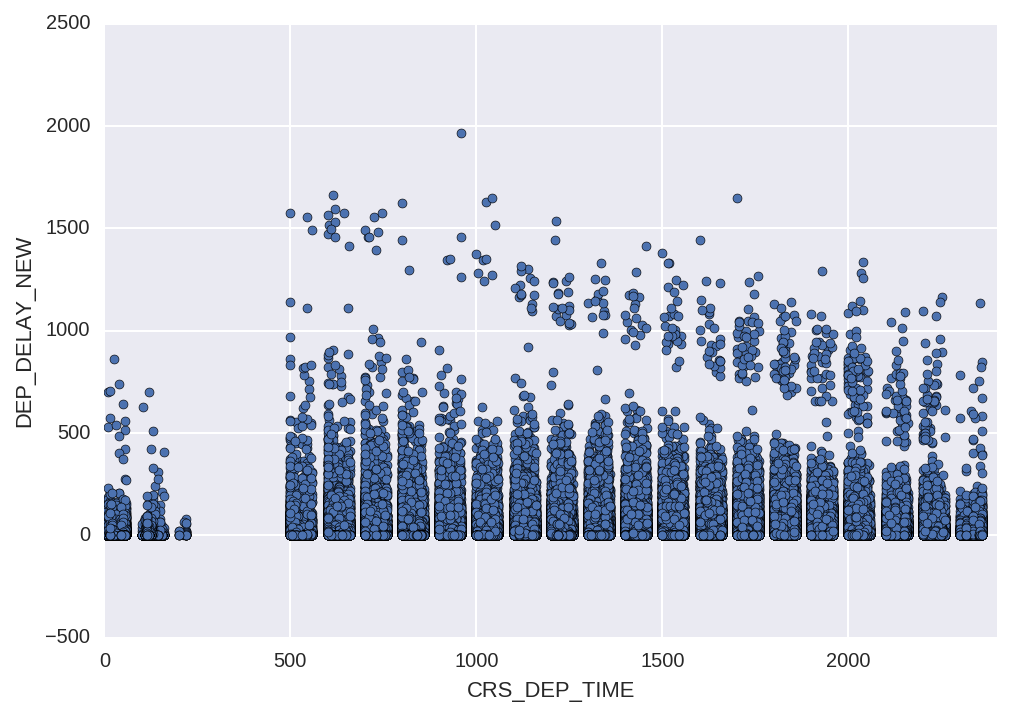

In [53]:
dfAA = df_2016[df_2016.UNIQUE_CARRIER=='AA']
dfB6 = df_2016[df_2016.UNIQUE_CARRIER=='B6']
#df.head(2)
matplotlib.rcParams['agg.path.chunksize'] = 100000
plt_AAtime = dfAA.plot.scatter(x='CRS_DEP_TIME', y = 'DEP_DELAY_NEW')
plt_AAtime.set_xlim(0, 2400)


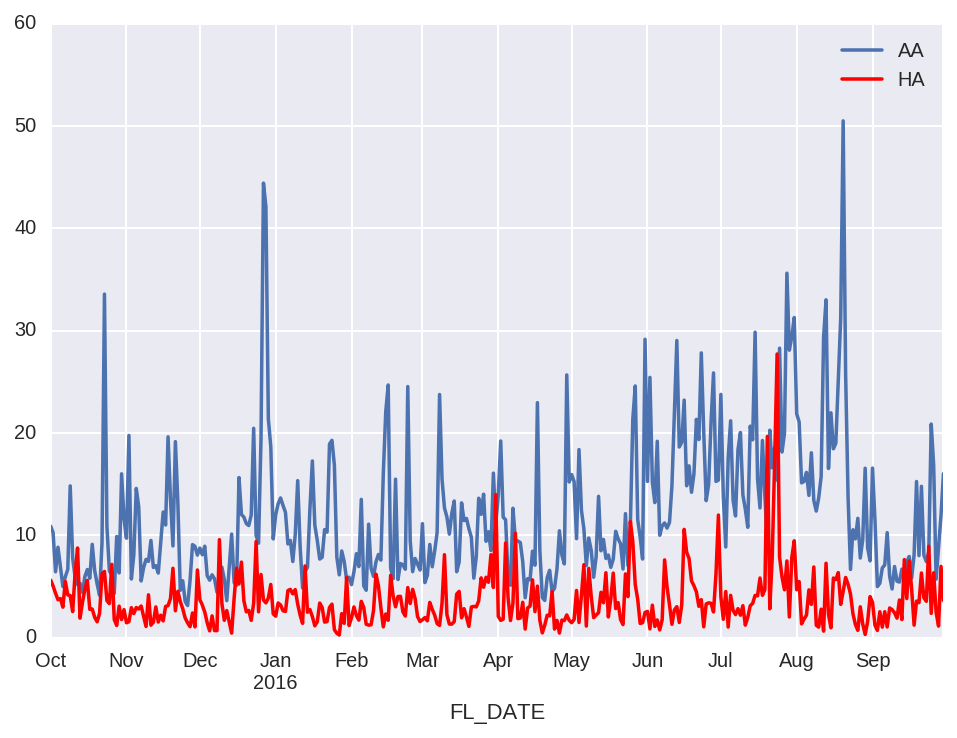

In [68]:
import datetime
dfAA = df_2016[df_2016.UNIQUE_CARRIER=='AA']
pd.options.mode.chained_assignment = None
#dfAA['FL_DATE'] = pd.to_datetime(dfAA['FL_DATE'])
#dfAA.index = pd.to_datetime(dfAA['FL_DATE'])
#del dfAA['FL_DATE']
#plt_AAdate = 

thisplot = dfAA.resample('D').DEP_DELAY_NEW.mean().plot(label = 'AA')
dfHA = df_2016[df_2016.UNIQUE_CARRIER=='HA']
pd.options.mode.chained_assignment = None
#dfAA['FL_DATE'] = pd.to_datetime(dfAA['FL_DATE'])
#dfAS.index = pd.to_datetime(dfAS['FL_DATE'])
#del dfAS['FL_DATE']
#plt_AAdate = 

dfHA.resample('D').DEP_DELAY_NEW.mean().plot(ax = thisplot,color = 'r', label = 'HA')
lines, labels = thisplot.get_legend_handles_labels()
thisplot.legend(lines[:2], labels[:2], loc='best')

In [ ]:
#pd.options.mode.chained_assignment = None
#dfAA['FL_DATE'] = pd.to_datetime(dfAA['FL_DATE'])
#df_2016.index = pd.to_datetime(df_2016['FL_DATE'])
#del df_2016['FL_DATE']
#df_2016[:10]


#

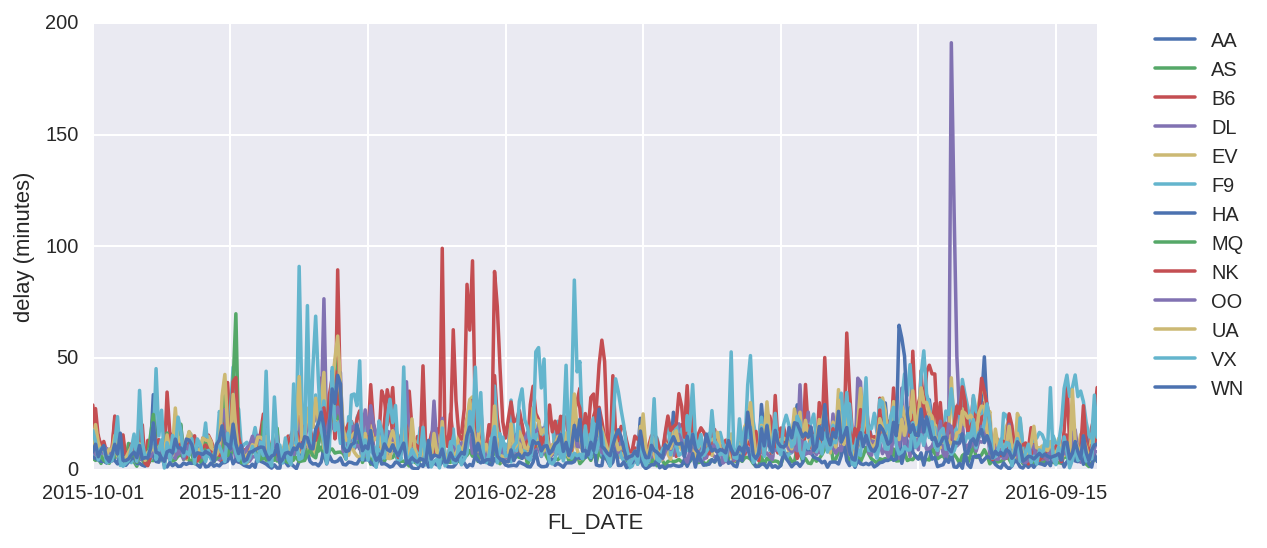

In [58]:
#fig, ax = matplotlib.pyplot.subplots(1,1)
#df_2016.groupby('UNIQUE_CARRIER').resample('D').delay.mean().plot(ax=ax)
DFGroup = df_2016.groupby(['UNIQUE_CARRIER','FL_DATE'])

DFGPlot = DFGroup.mean().unstack('UNIQUE_CARRIER').DEP_DELAY_NEW.plot(kind='line', figsize=(9,4))
DFGPlot.set_ylabel('delay (minutes)')
DFGPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#matplotlib.pyplot.legend([v[0] for v in df_2016.groupby('UNIQUE_CARRIER')['UNIQUE_CARRIER']])

#df_2016.groupby('UNIQUE_CARRIER').resample('D').delay.mean().plot(legend=True, color = 'r')

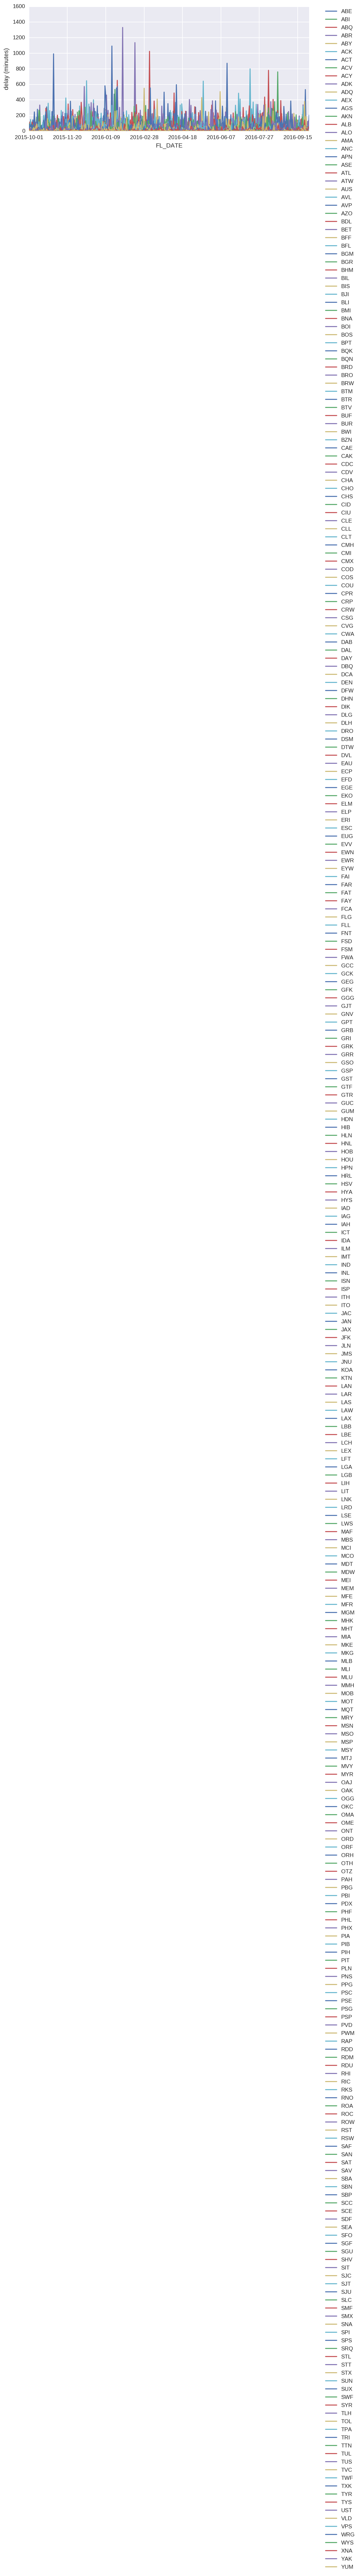

In [59]:
DFGroup = df_2016.groupby(['ORIGIN','FL_DATE'])

DFGPlot = DFGroup.mean().unstack('ORIGIN').DEP_DELAY_NEW.plot(kind='line', figsize=(9,4))
DFGPlot.set_ylabel('delay (minutes)')
DFGPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [60]:

df_2016.index = pd.to_datetime(df_2016['FL_DATE'])
del df_2016['FL_DATE']
#plt_AAdate = 



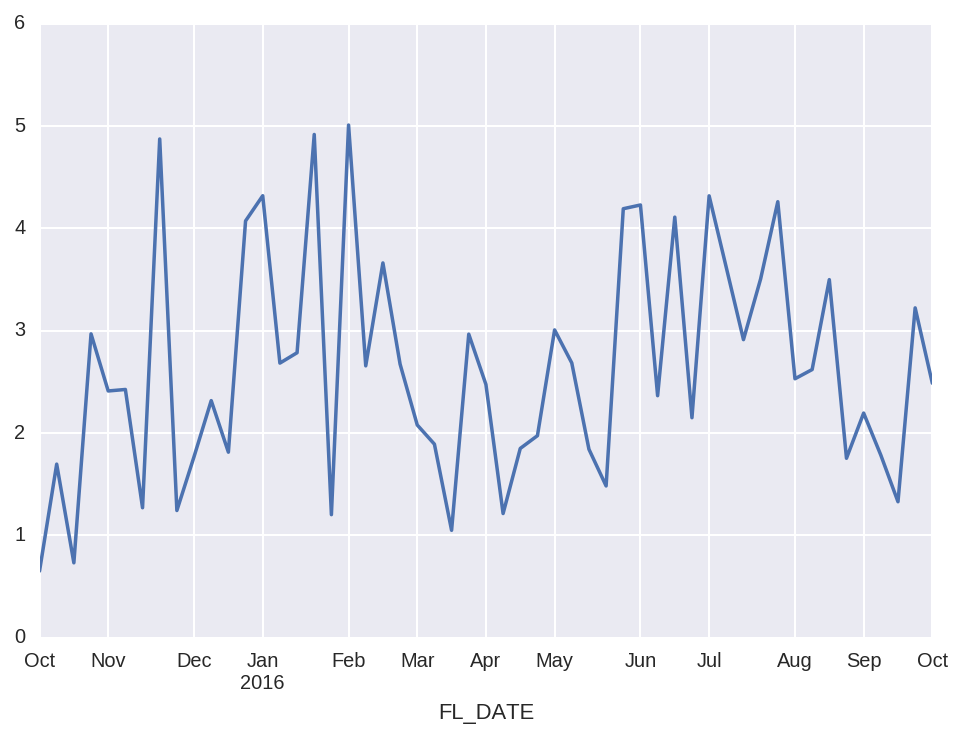

In [61]:
df_2016.resample('W').WEATHER_DELAY.mean().plot()

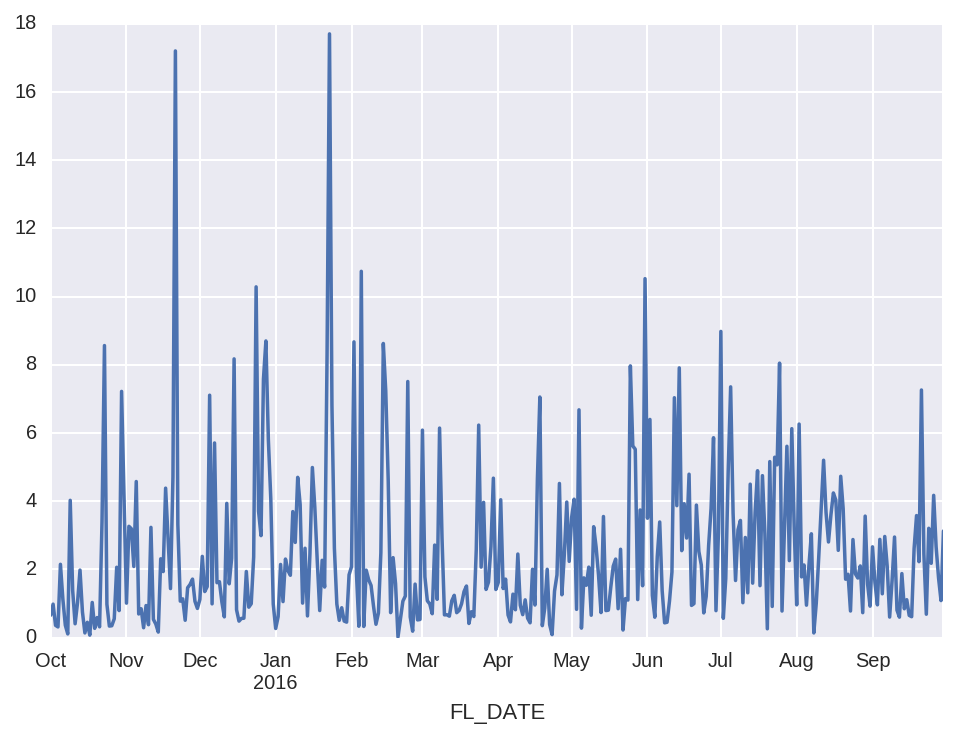

In [62]:
df_2016.resample('D').WEATHER_DELAY.mean().plot()

In [63]:
dfDFW = df_2016[df_2016.ORIGIN=='DFW']
dfSEA = df_2016[df_2016.ORIGIN=='SEA']



(0, 2400)

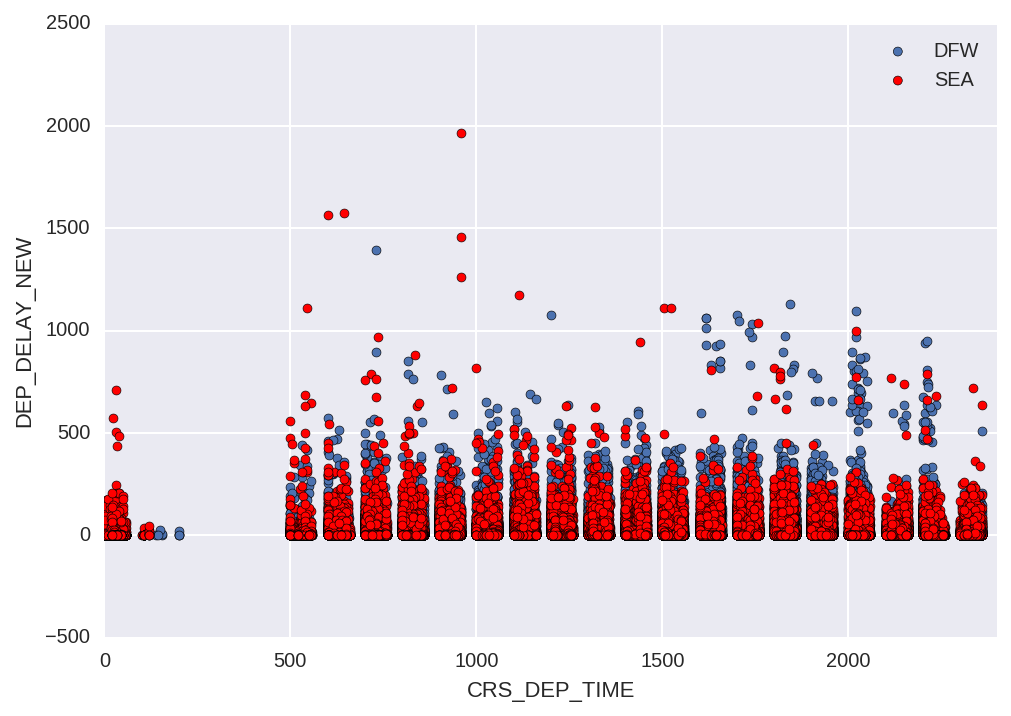

In [64]:
plt_DFWtime = dfDFW.plot.scatter(x='CRS_DEP_TIME', y = 'DEP_DELAY_NEW',label = 'DFW')
dfSEA.plot.scatter(ax=plt_DFWtime,x='CRS_DEP_TIME', y = 'DEP_DELAY_NEW', color = 'r', label = 'SEA')
lines, labels = plt_DFWtime.get_legend_handles_labels()
plt_DFWtime.legend(lines[:2], labels[:2], loc='best')
plt_DFWtime.set_xlim(0, 2400)

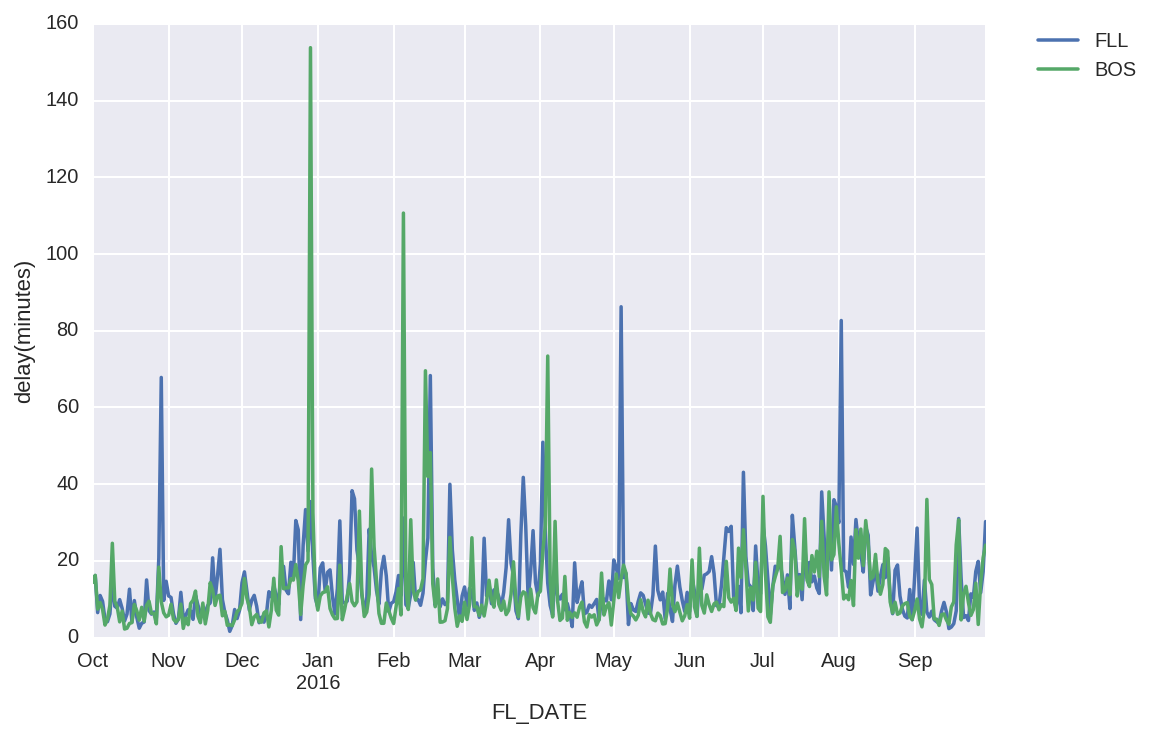

In [69]:
dfFLL = df_2016[df_2016.ORIGIN=='FLL']

myplot = dfFLL.resample('D').DEP_DELAY_NEW.mean().plot(label = 'FLL')
dfBOS = df_2016[df_2016.ORIGIN=='BOS']

dfBOS.resample('D').DEP_DELAY_NEW.mean().plot(ax = myplot,label = 'BOS')
myplot.set_ylabel("delay(minutes)")
myplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In Florida we can see weather delays in May (hurricane season???) while in Boston there are delays in the winter (snow!)

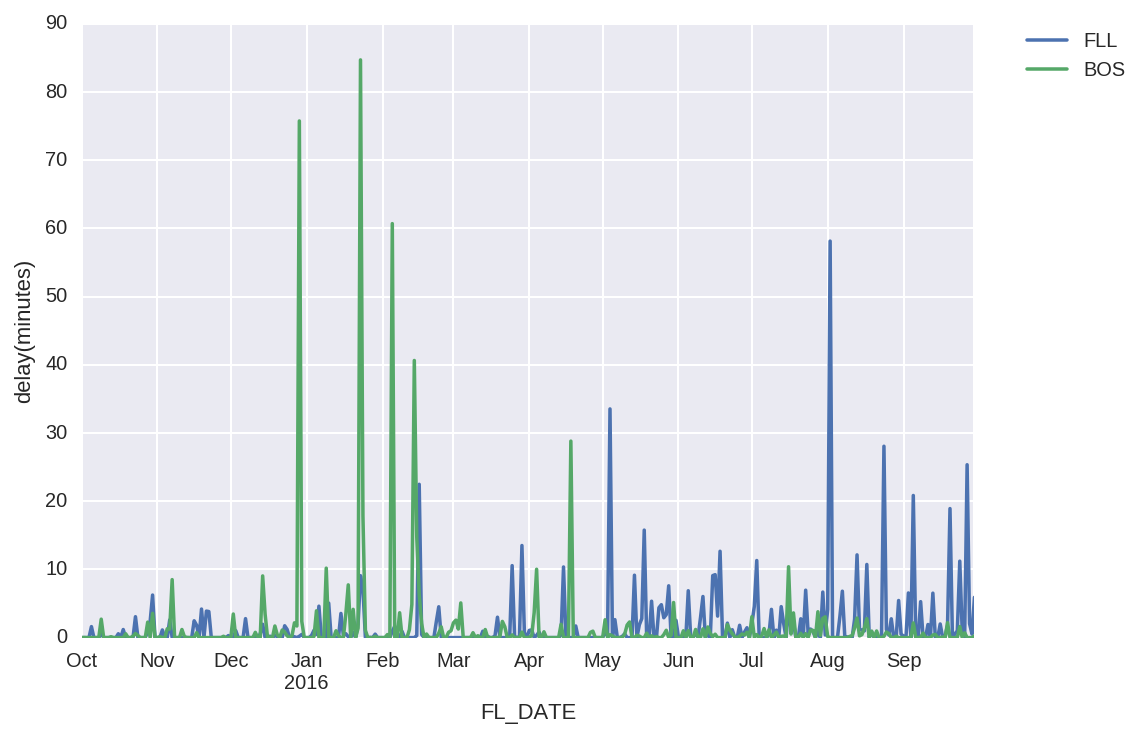

In [70]:
dfFLL = df_2016[df_2016.ORIGIN=='FLL']

myplot = dfFLL.resample('D').WEATHER_DELAY.mean().plot(label = 'FLL')
dfBOS = df_2016[df_2016.ORIGIN=='BOS']

dfBOS.resample('D').WEATHER_DELAY.mean().plot(ax = myplot,label = 'BOS')
#dfPVD = df_2016[df_2016.ORIGIN=='PVD']

#dfPVD.resample('D').WEATHER_DELAY.mean().plot(ax = myplot,label = 'PVD')
myplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
myplot.set_ylabel("delay(minutes)")